<h2 style='text-align: right;'> Vinayasree Kalburgi </h2>

# SVM - Support Vector Machines

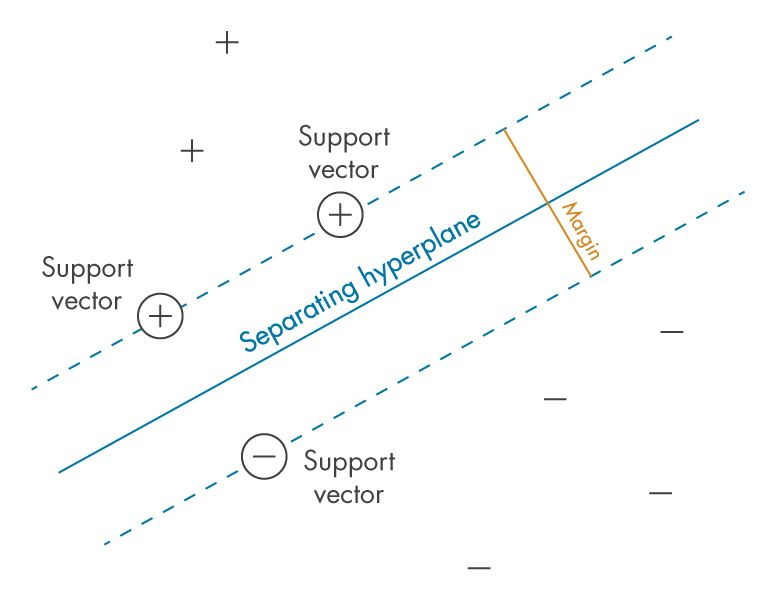

#### Preparing Data for SVM

##### Numerical Conversion:
- SVM assumes that you have inputs are numerical instead of categorical.

- So you can convert them using one of the most commonly used techniques like one hot encoding, label-encoding, etc.


##### Binary Conversion:
- Since SVM is able to classify only binary data so you would need to convert the multi-dimensional dataset into binary form using (one vs the rest method / one vs one method) conversion method.


- Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad.

- But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

- With 81 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset challenges you to predict the final price of each home.

- The dataset House Prices available on Kaggle at: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

#### Data Description

<br> 

| Column Name | Description |
|:-----------:|:-----------:|
| **SalePrice** | The property's sale price in dollars (target variable that we're trying to predict). |
| MSSubClass | The building class. |
| MSZoning | The general zoning classification. |
| LotFrontage | Linear feet of street connected to property. |
| LotArea | Lot size in square feet. |
| Street | Type of road access. |
| Alley | Type of alley access. |
| LotShape | General shape of property. |
| LandContour | Flatness of the property. |
| Utilities | Type of utilities available. |
| LotConfig | Lot configuration. |
| LandSlope | Slope of property. |
| Neighborhood | Physical locations within Ames city limits. |
| Condition1 | Proximity to main road or railroad. |
| Condition2 | Proximity to main road or railroad (if a second is present). |
| BldgType | Type of dwelling. |
| HouseStyle | Style of dwelling. |
| OverallQual | Overall material and finish quality. |
| OverallCond | Overall condition rating. |
| YearBuilt | Original construction date. |
| YearRemodAdd | Remodel date. |
| RoofStyle | Type of roof. |
| RoofMatl | Roof material. |
| Exterior1st | Exterior covering on house. |
| Exterior2nd | Exterior covering on house (if more than one material). |
| MasVnrType | Masonry veneer type. |
| MasVnrArea | Masonry veneer area in square feet. |
| ExterQual | Exterior material quality. |
| ExterCond | Present condition of the material on the exterior. |
| Foundation | Type of foundation. |
| BsmtQual | Height of the basement. |
| BsmtCond | General condition of the basement. |
| BsmtExposure | Walkout or garden level basement walls. |
| BsmtFinType1 | Quality of basement finished area. |
| BsmtFinSF1 | Type 1 finished square feet. |
| BsmtFinType2 | Quality of second finished area (if present). |
| BsmtFinSF2 | Type 2 finished square feet. |
| BsmtUnfSF | Unfinished square feet of basement area. |
| TotalBsmtSF | Total square feet of basement area. |
| Heating | Type of heating. |
| HeatingQC | Heating quality and condition. |
| CentralAir | Central air conditioning. |
| Electrical | Electrical system. |
| 1stFlrSF | First Floor square feet. |
| 2ndFlrSF | Second floor square feet. |
| LowQualFinSF | Low quality finished square feet (all floors). |
| GrLivArea | Above grade (ground) living area square feet. |
| BsmtFullBath | Basement full bathrooms. |
| BsmtHalfBath | Basement half bathrooms. |
| FullBath | Full bathrooms above grade. |
| HalfBath | Half baths above grade. |
| Bedroom | Number of bedrooms above basement level. |
| Kitchen | Number of kitchens. |
| KitchenQual | Kitchen quality. |
| TotRmsAbvGrd | Total rooms above grade (does not include bathrooms). |
| Functional | Home functionality rating. |
| Fireplaces | Number of fireplaces. |
| FireplaceQu | Fireplace quality. |
| GarageType | Garage location. |
| GarageYrBlt | Year garage was built. |
| GarageFinish | Interior finish of the garage. |
| GarageCars | Size of garage in car capacity. |
| GarageArea | Size of garage in square feet. |
| GarageQual | Garage quality. |
| GarageCond | Garage condition. |
| PavedDrive | Paved driveway. |
| WoodDeckSF | Wood deck area in square feet. |
| OpenPorchSF | Open porch area in square feet. |
| EnclosedPorch | Enclosed porch area in square feet. |
| 3SsnPorch | Three season porch area in square feet. |
| ScreenPorch | Screen porch area in square feet. |
| PoolArea | Pool area in square feet. |
| PoolQC | Pool quality. |
| Fence | Fence quality. |
| MiscFeature | Miscellaneous feature not covered in other categories. |
| MiscVal | $Value of miscellaneous feature. |
| MoSold | Month Sold. |
| YrSold | Year Sold. |
| SaleType | Type of sale. |
| SaleCondition | Condition of sale. |

<a id=section3></a>
## Data Loading and Description

### Import the packages

In [2]:
!pip install category_encoders 

     |████████████████████████████████| 81kB 1.8MB/s 


In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

%matplotlib inline

- After loading libraries, we need to read and display the dataframe.

### Importing the Data

In [44]:
prices = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/house.csv')
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- The idea of this dataset is to provide with a series of features which have as a __target value__ the __cost of a house__.

### Checking the columns present in dataset

In [45]:
prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Checking the shape of the datset

In [46]:
prices.shape

(1460, 81)

### Check the info of dataset

In [47]:
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [48]:
prices.select_dtypes(include=['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


**Observations**:

- This dataset contains **1460 samples** (rows) and **81 features** (columns).

- There are **38 numerical** features and **43 object** type features in the data.

### Check the descriptive stats of the dataset

In [49]:
prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Observations**:

- The `SalePrice` column has **outliers** present in it.

- The **maximum** value is **755000**.

- The maximum value is more than **3 times** the **75th percentile** value of **214000**.

<a id=section4></a>
## Data Preprocessing

- Now that we know that at least **half** of the features are **category** type, we need to analyze if those featuers have **null** values and handle them.

- So first we need to **extract** just the features of **object** type making a copy from the original.

In [50]:
# prices = all features except those with object type value
# prices_objects = all features with object type value
prices_objects = prices.select_dtypes(include=['object']).copy()
prices = prices.select_dtypes(exclude=['object']).copy()
prices_objects.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [51]:
prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


- Now, let's see how many values are **NAN** in `prices` and `prices_objects`. 

In [52]:
prices = prices.drop(['Id'],axis=1)
prices.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

**Observations**:

- We can see that featues as `LotFrontage` and `GarageYrBlt` have some **null** values.

In [53]:
prices_objects.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

**Observations**:

- We can see that the features: `Alley`, `MasVnrType`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, `MiscFeature` all have **NaN** values.

##  Solving the Problem of NaN Values

- First we will focus on the dataset `prices_objects`.

- To solve the problem, first of all we need to know how many NaN values are there for each feature as showed above. 

- So as we know, the first feature `Alley` has **1369 NaN** values of 1460, this represent the **93%** of all data.

- The same case apply for features like: `PoolQC`, `Fence`, `MiscFeature` which represent **99%**, **80%** and **96%** of all data.

- So based on this information we proceed to **drop** all of this features.

In [54]:
# Dropping not necessary features
prices_objects = prices_objects.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1)

- Now that we have dropped some features that we do not need, we will to proceed fixing the rest of features which are:

<br>
<table>
  <tr>
    <th>Feature</th>
    <th>Number of Nan</th> 
  </tr>
  <tr>
    <td>BsmtQual</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtCond</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtExposure</td>
    <td>38</td>
  </tr>
  <tr>
    <td>BsmtFinType1</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtFinType2</td>
    <td>38</td>
  </tr>
  <tr>
    <td>Electrical</td>
    <td>1</td>
  </tr>
  <tr>
    <td>FireplaceQu</td>
    <td>690</td>
  </tr>
  <tr>
    <td>GarageType</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageFinish</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageQual</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageCond</td>
    <td>81</td>
  </tr>
  <tr>
    <td>MasVnrType</td>
    <td>8</td>
  </tr>
</table>

- There are many ways in how to handle NaN values.

- In this case we just are going to use the **top category** in each feature.

- So we will break down the first two features `BsmtQual` and `BsmtCond` and then apply the same for the rest of features.

- So let's start with the `BsmtQual` feature.

### Plotting Frequency Distribution for Variable **`BsmtQual`**

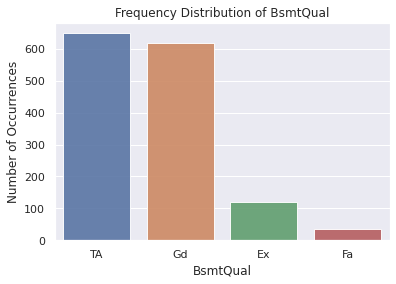

In [55]:
BsmtQual_count = prices_objects['BsmtQual'].value_counts()
sb.set(style="darkgrid")
sb.barplot(BsmtQual_count.index, BsmtQual_count.values, alpha=0.9)
plt.title('Frequency Distribution of BsmtQual')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BsmtQual', fontsize=12)
plt.show()

**Observations**:

- We can see that the category **TA** is the top one.

- So we are going to **replace** the **NaN** values with this value.

In [56]:
prices_objects['BsmtQual'] = prices_objects['BsmtQual'].fillna(prices_objects['BsmtQual'].value_counts().index[0])

- Now let's analyze the `BsmtCond` feature.

### Plotting Frequency Distribution for Variable `BsmtCond`

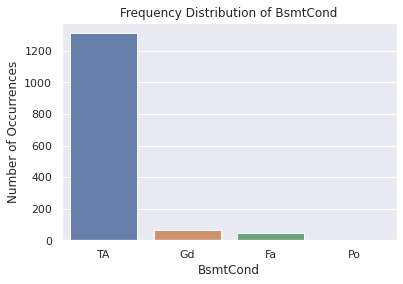

In [57]:
BsmtCond_count = prices_objects['BsmtCond'].value_counts()
sb.set(style="darkgrid")
sb.barplot(BsmtCond_count.index, BsmtCond_count.values, alpha=0.9)
plt.title('Frequency Distribution of BsmtCond')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BsmtCond', fontsize=12)
plt.show()

**Observations**:

- We can see that the category `TA` is the **top** one.

- So we are going to **replace** the **NaN** values with this value.

In [58]:
prices_objects['BsmtCond'] = prices_objects['BsmtCond'].fillna(prices_objects['BsmtCond'].value_counts().index[0])

- So now we will **apply** the **same methodology** to the rest of featues.

In [59]:
prices_objects['BsmtExposure'] = prices_objects['BsmtExposure'].fillna(prices_objects['BsmtExposure'].value_counts().index[0])

prices_objects['BsmtFinType1'] = prices_objects['BsmtFinType1'].fillna(prices_objects['BsmtFinType1'].value_counts().index[0])

prices_objects['BsmtFinType2'] = prices_objects['BsmtFinType2'].fillna(prices_objects['BsmtFinType2'].value_counts().index[0])

prices_objects['Electrical'] = prices_objects['Electrical'].fillna(prices_objects['Electrical'].value_counts().index[0])

prices_objects['FireplaceQu'] = prices_objects['FireplaceQu'].fillna(prices_objects['FireplaceQu'].value_counts().index[0])

prices_objects['GarageType'] = prices_objects['GarageType'].fillna(prices_objects['GarageType'].value_counts().index[0])

prices_objects['GarageFinish'] = prices_objects['GarageFinish'].fillna(prices_objects['GarageFinish'].value_counts().index[0])

prices_objects['GarageQual'] = prices_objects['GarageQual'].fillna(prices_objects['GarageQual'].value_counts().index[0])

prices_objects['GarageCond'] = prices_objects['GarageCond'].fillna(prices_objects['GarageCond'].value_counts().index[0])

prices_objects['MasVnrType'] = prices_objects['MasVnrType'].fillna(prices_objects['MasVnrType'].value_counts().index[0])

- **Reviewing** the data frame again.

- We will see that there isn't any null value.

In [60]:
prices_objects.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

- Now let's fix the **NaN** values from `prices` dataset.

- We will proceed with the **same technique** as with the `prices_objects`.

In [61]:
prices['LotFrontage'] = prices['LotFrontage'].fillna(prices['LotFrontage'].value_counts().index[0])

prices['MasVnrArea'] = prices['MasVnrArea'].fillna(prices['MasVnrArea'].value_counts().index[0])

prices['GarageYrBlt'] = prices['GarageYrBlt'].fillna(prices['GarageYrBlt'].value_counts().index[0])

In [62]:
prices.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

- Now let's see how is the **distribution** of each category for some features.

- In the first case we will analyze the object variable `MSZoning`.

In [63]:
# To show the count of every category in MSZoning column
print(prices_objects['MSZoning'].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


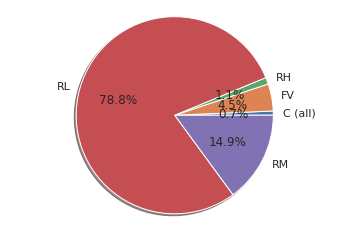

In [64]:
labels = prices_objects['MSZoning'].astype('category').cat.categories.tolist()
counts = prices_objects['MSZoning'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

**Observations**:

- The category **RL** has the **highest number of occurrences** in this column.

- Now we will analyze the **distribution** of categories in the variable `Exterior2nd`.

In [65]:
# To show the count of every category in MSZoning column
print(prices_objects['Exterior2nd'].value_counts())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


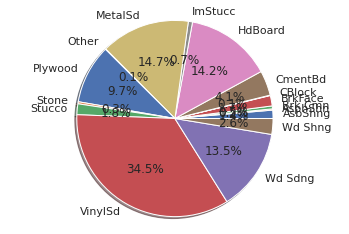

In [66]:
labels = prices_objects['Exterior2nd'].astype('category').cat.categories.tolist()
counts = prices_objects['Exterior2nd'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

**Observations**:

- The category **VinylSd** has the **largest proportion** in this feature.

## 3.2 Fixing the Problem with the Categorical Features

- We will use **Backward Difference Encoder** technique.

- This technique can be applied using the `category_encoders` library.

In [67]:
encoder = ce.BackwardDifferenceEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle',
            'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])

In [68]:
prices_objects_BackDiffEnc = encoder.fit_transform(prices_objects)
prices_objects_BackDiffEnc.head()

,intercept,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,...,Functional_0,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageFinish_0,GarageFinish_1,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,PavedDrive_0,PavedDrive_1,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.96,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.8,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,-0.6,-0.4,-0.2,-0.666667,-0.333333,0.04,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.96,-0.92,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,0.4,-0.4,-0.2,-0.666667,-0.333333,0.04,0.08,-0.88,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.8,-0.6,-0.4,-0.2,0.166667,-0.666667,-0.5,-0.333333,-0.166667,0.333333,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.5,0.2,-0.6,-0.4,-0.2,-0.666667,-0.333333,0.04,0.08,0.12,-0.84,-0.8,-0.76,-0.72,-0.68,-0.64,-0.6,-0.56,-0.52,-0.48,-0.44,-0.4,-0.36,-0.32,-0.28,-0.24,-0.2,-0.16,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


## 3.3 Scaling Data

- Extracting `Ytrain` **target vector** from the `prices` dataframe.

- Then, we will **remove** the `SalePrice` column from the `prices` dataframe.

- Finally, we will **concat** the **Backward Difference Encoded** columns to the `prices` dataframe.

In [69]:
Ytrain = prices.SalePrice
prices = prices.drop(['SalePrice'], axis=1)
prices_corpus = pd.concat([prices, prices_objects_BackDiffEnc], axis=1)

In [70]:
prices_corpus.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,intercept,MSZoning_0,MSZoning_1,MSZoning_2,...,Functional_0,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageFinish_0,GarageFinish_1,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,PavedDrive_0,PavedDrive_1,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,1,-0.8,-0.6,-0.4,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.8,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,1,-0.8,-0.6,-0.4,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,1,-0.8,-0.6,-0.4,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,1,-0.8,-0.6,-0.4,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,-0.8,-0.6,-0.4,-0.2,0.166667,-0.666667,-0.5,-0.333333,-0.166667,0.333333,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,1,-0.8,-0.6,-0.4,...,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,0.2,-0.6,-0.4,-0.2,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.888889,-0.777778,-0.666667,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


- **Creating** a `MinMaxScaler` object.

In [71]:
min_max_scaler = preprocessing.MinMaxScaler()

- **Transforming** the **train** set using the `min_max_scaler` object.

In [72]:
X = pd.DataFrame(min_max_scaler.fit_transform(prices_corpus), columns=prices_corpus.columns)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,intercept,MSZoning_0,MSZoning_1,MSZoning_2,...,Functional_0,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageFinish_0,GarageFinish_1,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,PavedDrive_0,PavedDrive_1,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing the Test Set

- **Loading** the test set.

In [73]:
prices_test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/house_test.csv')
prices_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- **Creating** the **object** dataframe and dropping columns.

In [74]:
prices_objects_test = prices_test.select_dtypes(include=['object']).copy()
prices_objects_test = prices_objects_test.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1)

- **Creating** the **numerical** dataframe and dropping columns.

In [75]:
prices_test = prices_test.select_dtypes(exclude=['object']).copy()
prices_test = prices_test.drop(['Id'],axis=1)

- **Filling missing values**.

In [76]:
prices_objects_test['MSZoning'] = prices_objects_test['MSZoning'].fillna( prices_objects_test['MSZoning'].value_counts().index[0])

prices_objects_test['Utilities'] = prices_objects_test['Utilities'].fillna(prices_objects_test['Utilities'].value_counts().index[0])

prices_objects_test['Exterior1st'] = prices_objects_test['Exterior1st'].fillna(prices_objects_test['Exterior1st'].value_counts().index[0])

prices_objects_test['Exterior2nd'] = prices_objects_test['Exterior2nd'].fillna(prices_objects_test['Exterior2nd'].value_counts().index[0])

prices_objects_test['BsmtCond'] = prices_objects_test['BsmtCond'].fillna(prices_objects_test['BsmtCond'].value_counts().index[0])

prices_objects_test['KitchenQual'] = prices_objects_test['KitchenQual'].fillna(prices_objects_test['KitchenQual'].value_counts().index[0])

prices_objects_test['Functional'] = prices_objects_test['Functional'].fillna(prices_objects_test['Functional'].value_counts().index[0])

prices_objects_test['SaleType'] = prices_objects_test['SaleType'].fillna(prices_objects_test['SaleType'].value_counts().index[0])

prices_objects_test['BsmtQual'] = prices_objects_test['BsmtQual'].fillna(prices_objects_test['BsmtQual'].value_counts().index[0])

prices_objects_test['BsmtExposure'] = prices_objects_test['BsmtExposure'].fillna(prices_objects_test['BsmtExposure'].value_counts().index[0])

prices_objects_test['BsmtFinType1'] = prices_objects_test['BsmtFinType1'].fillna(prices_objects_test['BsmtFinType1'].value_counts().index[0])

prices_objects_test['BsmtFinType2'] = prices_objects_test['BsmtFinType2'].fillna(prices_objects_test['BsmtFinType2'].value_counts().index[0])

prices_objects_test['Electrical'] = prices_objects_test['Electrical'].fillna(prices_objects_test['Electrical'].value_counts().index[0])

prices_objects_test['FireplaceQu'] = prices_objects_test['FireplaceQu'].fillna(prices_objects_test['FireplaceQu'].value_counts().index[0])

prices_objects_test['GarageType'] = prices_objects_test['GarageType'].fillna(prices_objects_test['GarageType'].value_counts().index[0])

prices_objects_test['GarageFinish'] = prices_objects_test['GarageFinish'].fillna(prices_objects_test['GarageFinish'].value_counts().index[0])

prices_objects_test['GarageQual'] = prices_objects_test['GarageQual'].fillna(prices_objects_test['GarageQual'].value_counts().index[0])

prices_objects_test['GarageCond'] = prices_objects_test['GarageCond'].fillna(prices_objects_test['GarageCond'].value_counts().index[0])

prices_objects_test['MasVnrType'] = prices_objects_test['MasVnrType'].fillna(prices_objects_test['MasVnrType'].value_counts().index[0])

prices_test['LotFrontage'] = prices_test['LotFrontage'].fillna(prices_test['LotFrontage'].value_counts().index[0])

prices_test['MasVnrArea'] = prices_test['MasVnrArea'].fillna(prices_test['MasVnrArea'].value_counts().index[0])

prices_test['GarageYrBlt'] = prices_test['GarageYrBlt'].fillna(prices_test['GarageYrBlt'].value_counts().index[0])

prices_test['BsmtFinSF1'] = prices_test['BsmtFinSF1'].fillna(prices_test['BsmtFinSF1'].value_counts().index[0])

prices_test['BsmtFinSF2'] = prices_test['BsmtFinSF2'].fillna(prices_test['BsmtFinSF2'].value_counts().index[0])

prices_test['BsmtUnfSF'] = prices_test['BsmtUnfSF'].fillna(prices_test['BsmtUnfSF'].value_counts().index[0])

prices_test['TotalBsmtSF'] = prices_test['TotalBsmtSF'].fillna(prices_test['TotalBsmtSF'].value_counts().index[0])

prices_test['BsmtFullBath'] = prices_test['BsmtFullBath'].fillna(prices_test['BsmtFullBath'].value_counts().index[0])

prices_test['BsmtHalfBath'] = prices_test['BsmtHalfBath'].fillna(prices_test['BsmtHalfBath'].value_counts().index[0])

prices_test['GarageCars'] = prices_test['GarageCars'].fillna(prices_test['GarageCars'].value_counts().index[0])

prices_test['GarageArea'] = prices_test['GarageArea'].fillna(prices_test['GarageArea'].value_counts().index[0])

- **Performing** Backward Difference Encoding

In [ ]:
prices_objects_BackDiffEnc_test = encoder.transform(prices_objects_test)

- **Concatinating** the backward difference encoded columns with the `prices_test` dataframe

In [77]:
prices_corpus_test = pd.concat([prices_test, prices_objects_BackDiffEnc_test], axis=1)

- **Transforming** the **test** set using the `min_max_scaler`.

In [102]:
Xtest = pd.DataFrame(min_max_scaler.transform(prices_corpus_test), columns=prices_corpus_test.columns)

## 4. Dimensionality Reduction

 - As we have 1460 rows and 81 explainatory variables
 
 - An additional step is used to reduce the number of explainatory variables but have maximum information available.

- **Creating** a **PCA** model and fitting it with the **train** set.

In [83]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

- Plotting the **variance ratio** with respect to the **number of features**.

Text(0, 0.5, 'Variance Ratio')

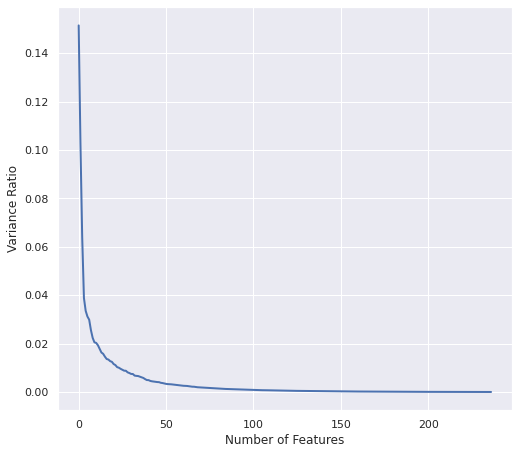

In [84]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Features')
plt.ylabel('Variance Ratio')

**Observations**:

- Based on the plot above, we will select **10 principal components** for this dataset.

- **Building** a **PCA** model with **10** principal components.

In [85]:
pca = PCA(n_components=10)

- **Fitting** the PCA model with the train set.

In [86]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [87]:
# Transforming train set
Xtrain_pca = pca.transform(X)

In [88]:
# Transforming test set
Xtest_pca = pca.transform(Xtest)

In [89]:
Ytrain = Ytrain.astype(float)

## 5. Support Vector Machine for Regression

- Creating a **SVR** model with a **polynomial** kernel.

- Using `C` equal to **0.8** and `epsilon` equal to **0.2** 

In [92]:
reg = SVR(C=0.8, epsilon=0.2, kernel='poly')

- **Fitting** the model on the **train** set.

In [93]:
reg.fit(Xtrain_pca, Ytrain)

SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Model Evaluation using MSE

In [103]:
from sklearn import metrics

In [104]:
Ypredict_train = reg.predict(Xtrain_pca)

In [105]:
MSE_train = metrics.mean_squared_error(Ytrain, Ypredict_train)

In [106]:
print('MSE for training set is {}'.format(MSE_train))

MSE for training set is 6617525688.8681


**Observations**:

- The **Mean Squared Error** for the train set is **6617525688.86**

### Model Evaluation using RMSE

In [107]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Ytrain, Ypredict_train))

In [108]:
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 81348.17569477572


**Observations**:

- The **Root Mean Squared Error** for the train set is **81348.17**

- This is **not** a **very good** score.

- We can **improve** it further with proper **Feature Engineering** and **Feature Selection**.

### Making Predictions on the Test Set

In [94]:
Ypredict_test = reg.predict(Xtest_pca)

- Creating the **predictions** dataframe.

In [97]:
Ypred = pd.DataFrame({'SalePrice': Ypredict_test})
Ypred.head()

,SalePrice
0,162999.146374
1,163014.343780
2,163114.595100
3,163132.631871
4,163070.412021


In [98]:
test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/house_test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [100]:
prediction = pd.concat([test['Id'], Ypred], axis=1)
prediction.head()

,Id,SalePrice
0,1461,162999.146374
1,1462,163014.343780
2,1463,163114.595100
3,1464,163132.631871
4,1465,163070.412021


### Conclusion


- We studied the **ideology** behind SVM, and the **intuition** development on the working of SVM.

- We also evaluated our model performance on the train set using various metrics.

  - Although we are not getting very good results here, SVM is most **widely used** for **classification** problems.

  - And we can improve the results using effecient **Feature Engineering** techniques.